In [1]:
import csv
import copy
import datetime
import matplotlib.pyplot as plt

In [2]:
hdates = ['2012-11-28','2016-07-09','2020-05-11']
for index,date in enumerate(hdates):
    dt_obj = datetime.datetime.strptime(date, "%Y-%m-%d")
    hdates[index]=dt_obj
non_zero = True

In [3]:
def open_CSV(fileName, halving, end_date = None):
    """
    'fileName', STRING, directory for the csv File.\n
    'halving', BOOLEAN, Applies BTC_Halving filter if True, no filter if False.\n
    'end_date', "YYYY-MM-DD", Extrapolates data for dates from end of csv File until end date stated. DEFAULTS to None.\n
    Returns : A list of [date, value]. 
    If halving is 'True' list of smaller lists is returned. 
    Else one whole list is returned.
    """
    priceList = []
    temp_list = []
    with open(fileName, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[0] == 'ï»¿Timestamp':
                continue
            else:
                time, price = row
                dt_obj = datetime.datetime.strptime(time, "%Y-%m-%d %H:%M:%S")
                priceList.append([dt_obj,price])
        if end_date != None:
            ed = datetime.datetime.strptime(end_date, "%Y-%m-%d")
            dt_obj += datetime.timedelta(days=3)
            priceList.append([dt_obj,0])
            priceList.append([ed,0])
            end_date = None
        if halving:
            halved_list = []
            halving_dates = copy.deepcopy(hdates)
            for time,price in priceList:
                if len(halving_dates)!=0 and time > halving_dates[0]:
                    halved_list.append(copy.deepcopy(temp_list))
                    temp_list.clear()
                    halving_dates.remove(halving_dates[0])
                temp_list.append([time,price])
            halved_list.append(copy.deepcopy(temp_list))
            temp_list.clear()
        else:
            return [priceList]
        return halved_list

In [4]:
def plot_halves(datePrice, style):
    """
    'datePrice', ARRAY [date, value], from the csv file.\n
    'style', BOOLEAN, plots all in one figure if False, separately if True.\n
    Plots Linear Scaled chart. If 'style' is False: Plot all in one. True: Plot in separate
    """
    x=[]
    y=[]
    for index, dp in enumerate(datePrice):
        for date,price in datePrice[index]:
            #print(price)
            x.append(date)
            y.append(float(price))
        if style:
            plt.figure()
        plt.plot(x,y)
        plt.gcf().autofmt_xdate()
        #print(len(x),len(y))
        x.clear()
        y.clear()
    plt.show()

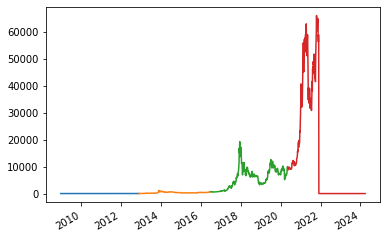

In [5]:
halves = open_CSV('BTCPrice.csv', True, "2024-03-27")
plot_halves(halves, False)

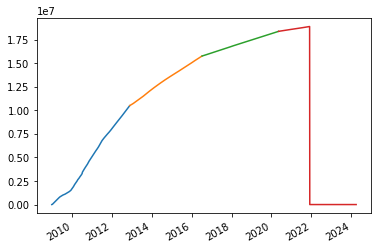

In [6]:
supply = open_CSV('BTCSupply.csv', True, "2024-03-27")
plot_halves(supply, False)

In [7]:
StartDate = "12/10/11"

Date = datetime.datetime.strptime(StartDate, "%m/%d/%y") + datetime.timedelta(days=10)
print(Date)
for x in range(10):
    Date += datetime.timedelta(days=10)
print(Date)

2011-12-20 00:00:00
2012-03-29 00:00:00
